# **Random Forest**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [2]:
df = pd.read_csv('Movie_classification.csv')
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

De la tabla anterior, se puede apreciar que la variable **"Time_takes"** contiene datos faltantes, y existen variables categóricas; **"3D_available"**, y **"Genre"**.

# **Tratamiento de datos faltantes**

In [4]:
mean = df['Time_taken'].mean()
mean

157.39149797570855

In [5]:
# imputamos datos faltantes por la media
df['Time_taken'] = df['Time_taken'].fillna(mean) 

In [6]:
# verificamos que ya no existan datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Debido a que no existen datos faltantes, procedemos a transformar variables categóricas a numéricas.

# **Variables categóricas**

In [7]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [8]:
df =  pd.get_dummies(df, ['3D_available', 'Genre'], drop_first=True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [9]:
freq_class = df.groupby('Start_Tech_Oscar')['Start_Tech_Oscar'].count()
freq_class

Start_Tech_Oscar
0    230
1    276
Name: Start_Tech_Oscar, dtype: int64

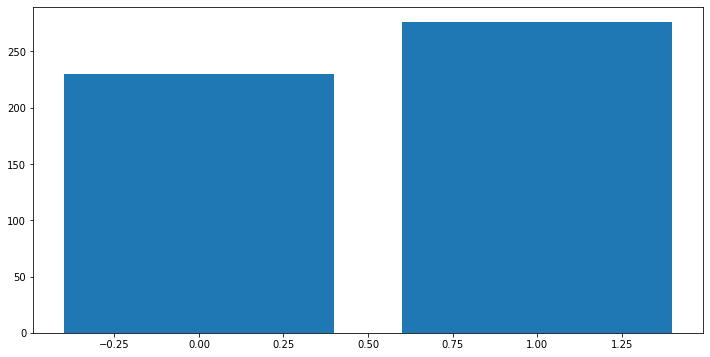

In [10]:
plt.figure(figsize=(12,6))
plt.bar(freq_class.index, freq_class)
plt.show()

# **Separación X, y**

In [11]:
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

# **División train_test**

In [12]:
# separación en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Random forest (clasificación)**

Parámetros:
- **n_estimators** : Número de árboles a generar.

- **criterion** : Función para medir la calidad de una división. Los criterios soportados son *"gini"* para la impureza de Gini y *"log_loss"* y *"entropy"* ambos para la ganancia de información de Shannon.

- **max_depth** : Profundidad máxima del árbol. Si es *None*, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos que *min_samples_split*.

- **min_samples_leaf** : Número mínimo de muestras requerido para estar en un nodo hoja. Un punto de división en cualquier profundidad sólo se considerará si deja al menos *min_samples_leaf* muestras de entrenamiento en cada una de las ramas izquierda y derecha.

**Referencia:** [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [13]:
rf = RandomForestClassifier(n_estimators=10, max_depth=6, min_samples_split=3, min_samples_leaf=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=10)

# **Predicción**

In [14]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# **Rendimiento (Performance)**

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [16]:
  # metrics for train
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1score = f1_score(y_train, y_pred_train)
confusionm = confusion_matrix(y_train, y_pred_train)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(f1score))

Accuracy: 0.8559322033898306
Precision: 0.845
Recall: 0.8941798941798942
F1score: 0.8688946015424165


In [17]:
confusionm

array([[134,  31],
       [ 20, 169]])

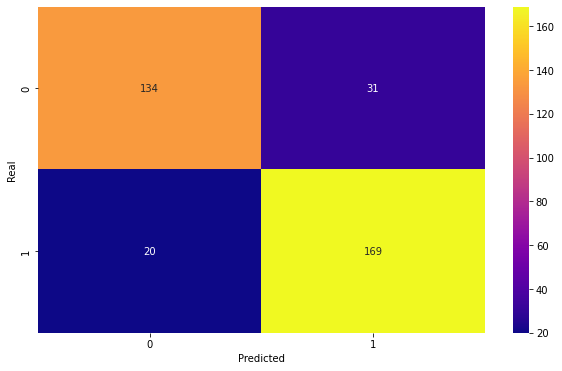

In [19]:
# Confusion matrix for Random Forest
target_labels = ['0','1']

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_train, y_pred_train)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

In [20]:
# metrics for test
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1score = f1_score(y_test, y_pred_test)
confusionm = confusion_matrix(y_test, y_pred_test)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(f1score))

Accuracy: 0.5921052631578947
Precision: 0.6373626373626373
Recall: 0.6666666666666666
F1score: 0.651685393258427


In [21]:
confusionm

array([[32, 33],
       [29, 58]])

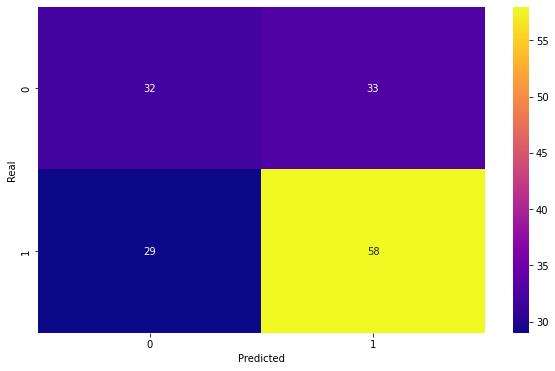

In [22]:
# Confusion matrix for Random Forest
target_labels = ['0','1']

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred_test)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

# **Feature importance**

In [26]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [53]:
importancias = rf.feature_importances_
serie_importancias = pd.Series(importancias, index=feature_names).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

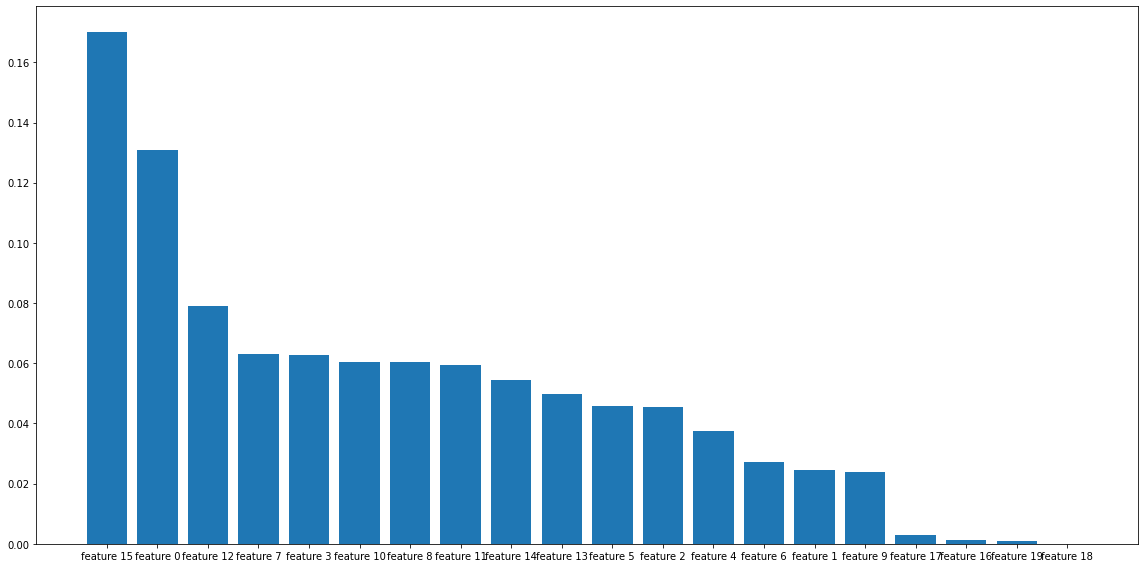

In [60]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(serie_importancias.index, serie_importancias)
fig.tight_layout()
plt.show()

In [59]:
feature_importances = {name:score for name, score in zip(list(X), rf.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted 

Collection             0.170078
Marketing expense      0.130715
Twitter_hastags        0.079110
Director_rating        0.063098
Budget                 0.062760
Trailer_views          0.060441
Producer_rating        0.060344
Time_taken             0.059497
Num_multiplex          0.054398
Avg_age_actors         0.049913
Lead_ Actor_Rating     0.045737
Multiplex coverage     0.045484
Movie_length           0.037439
Lead_Actress_rating    0.027313
Production expense     0.024558
Critic_rating          0.023955
Genre_Comedy           0.002945
3D_available_YES       0.001380
Genre_Thriller         0.000837
Genre_Drama            0.000000
dtype: float64

# **Reducción de características**

In [69]:
# seleccionamos las 10 primeras
columns = feature_importances_sorted.index[:10] 

In [70]:
# filtramos conjunto de entrenamiento y de prueba
X_train_reduced = X_train[columns].copy()
X_test_reduced = X_test[columns].copy()

# **Random forest**

In [71]:
rf = RandomForestClassifier(n_estimators=10, max_depth=6, min_samples_split=3, min_samples_leaf=3)
rf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=10)

# **Predicción**

In [72]:
y_pred_train_reduced = rf.predict(X_train_reduced)
y_pred_test_reduced = rf.predict(X_test_reduced)

# **Rendimiento**

In [73]:
  # metrics for train
accuracy = accuracy_score(y_train, y_pred_train_reduced)
precision = precision_score(y_train, y_pred_train_reduced)
recall = recall_score(y_train, y_pred_train_reduced)
f1score = f1_score(y_train, y_pred_train_reduced)
confusionm = confusion_matrix(y_train, y_pred_train_reduced)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(f1score))

Accuracy: 0.8502824858757062
Precision: 0.8434343434343434
Recall: 0.8835978835978836
F1score: 0.8630490956072351


In [74]:
  # metrics for test
accuracy = accuracy_score(y_test, y_pred_test_reduced)
precision = precision_score(y_test, y_pred_test_reduced)
recall = recall_score(y_test, y_pred_test_reduced)
f1score = f1_score(y_test, y_pred_test_reduced)
confusionm = confusion_matrix(y_test, y_pred_test_reduced)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(f1score))

Accuracy: 0.6052631578947368
Precision: 0.6451612903225806
Recall: 0.6896551724137931
F1score: 0.6666666666666667
